In [10]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 1000
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(128, kernel_size=(4, 4),strides=(2,2),padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(128, (4, 4),strides=(2, 2),padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2),strides=1,padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (4, 4),strides=(1,1),padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1),strides=(1,1),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (4, 4),strides=(1,1),padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1),strides=(1,1),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (4, 4),strides=(1,1),padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (4, 4),strides=(1,1),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (2, 2),strides=(1,1),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1),padding='same'))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 693s 12ms/step - loss: 2.2275 - acc: 0.1480 - val_loss: 1.9450 - val_acc: 0.3045
Epoch 2/12
60000/60000 [==============================] - 695s 12ms/step - loss: 1.9311 - acc: 0.2349 - val_loss: 1.3380 - val_acc: 0.6702
Epoch 3/12
60000/60000 [==============================] - 701s 12ms/step - loss: 1.7033 - acc: 0.3181 - val_loss: 1.0159 - val_acc: 0.8347
Epoch 4/12
60000/60000 [==============================] - 650s 11ms/step - loss: 1.6062 - acc: 0.3668 - val_loss: 0.8688 - val_acc: 0.8500
Epoch 5/12
60000/60000 [==============================] - 624s 10ms/step - loss: 1.5286 - acc: 0.4042 - val_loss: 0.6423 - val_acc: 0.8475
Epoch 6/12
60000/60000 [==============================] - 661s 11ms/step - loss: 1.3391 - acc: 0.5023 - val_loss: 0.5335 - val_acc: 0.9608
Epoch 7/12
60000/60000 [===================

In [ ]:
# history=model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           validation_data=(x_test, y_test))

# vy = history.history['val_loss']
# ty = history.history['loss']

#### Error Plots for 7 Layer CNN on MNIST

<IPython.core.display.Javascript object>


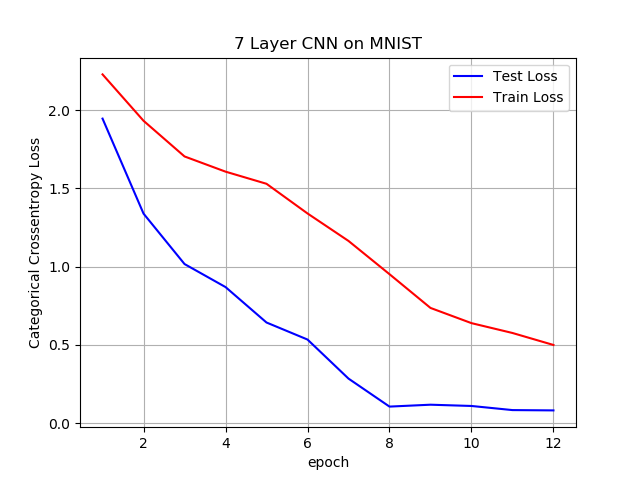

In [3]:

epochs=12
x = list(range(1,epochs+1))
ty=[2.2275,1.9311,1.7033,1.6062,1.5286,1.3391,1.1635, 0.9511,0.7355,0.6383,0.5754,0.4988]
vy=[1.9450,1.3380,1.0159,0.8688,0.6423,0.5335,0.2840,0.1051,0.1172,0.1091,0.0828,0.0808]

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Test Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; 
ax.set_ylabel('Categorical Crossentropy Loss')
ax.set_title(label="7 Layer CNN on MNIST")
plt_dynamic(x, vy, ty, ax)